In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
%time
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow_datasets as tfds


def load_mini():
    # Mini mnist
    mnist = datasets.load_digits()
    mnist_data = mnist["data"]
    mnist_labels = mnist["target"]
    
    return mnist_data, mnist_labels

def load_real():
    # Real mnist
    mnist = tfds.load(name="mnist")["train"]
    mnist_data = []
    mnist_labels = []
    for sample in tfds.as_numpy(mnist):
        image = sample["image"]
        label = sample["label"]

        mnist_data.append(image.reshape(-1) / 256)
        mnist_labels.append(label)

    return np.array(mnist_data), np.array(mnist_labels)

def load_test():
    # Real mnist
    mnist = tfds.load(name="mnist")["test"]
    mnist_data = []
    mnist_labels = []
    for sample in tfds.as_numpy(mnist):
        image = sample["image"]
        label = sample["label"]

        mnist_data.append(image.reshape(-1) / 256)
        mnist_labels.append(label)

    return np.array(mnist_data), np.array(mnist_labels)

mnist_data, mnist_labels = load_real()
#mnist_data, mnist_labels = load_mini()


im_sz = int(np.sqrt(mnist_data[0].size))

data_dim = mnist_data[0].size

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.29 µs


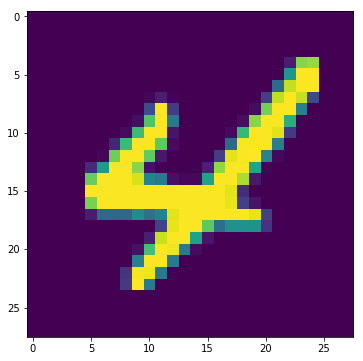

In [51]:
import random

sample = random.sample(list(mnist_data), k=1)[0].reshape(im_sz, im_sz)


plt.figure(figsize=(10, 6))
plt.imshow(sample)
plt.show()


Normal Distribution VAE
---

In [22]:
import vae
import tensorflow as tf

encoder, decoder = vae.dense_encoder_decoder(data_dim, 
                                             latent_dim=2, 
                                             layers=4, 
                                             hidden_units=128, 
                                             activation=tf.nn.relu)

v = vae.VAE(encoder, decoder, C=3.0)

v.fit(mnist_data, batch_size=64, epochs=30)



epoch 0 - 23.18    
epoch 1 - 18.87    
epoch 2 - 17.17    
epoch 3 - 16.52    
epoch 4 - 16.14    
epoch 5 - 15.90    
epoch 6 - 15.60    
epoch 7 - 15.36    
epoch 8 - 15.17    
epoch 9 - 15.08    
epoch 10 - 14.93   
epoch 11 - 14.77   
epoch 12 - 14.67   
epoch 13 - 14.61   
epoch 14 - 14.57   
epoch 15 - 14.55   
epoch 16 - 14.47   
epoch 17 - 14.33   
epoch 18 - 14.26   
epoch 19 - 14.34   
epoch 20 - 14.40   
epoch 21 - 14.26   
epoch 22 - 14.27   
epoch 23 - 14.15   
epoch 24 - 14.06   
epoch 25 - 14.09   
epoch 26 - 14.00   
epoch 27 - 13.97   
epoch 28 - 14.10   
epoch 29 - 13.94   


First 2 Dimensions in Latent Space
---

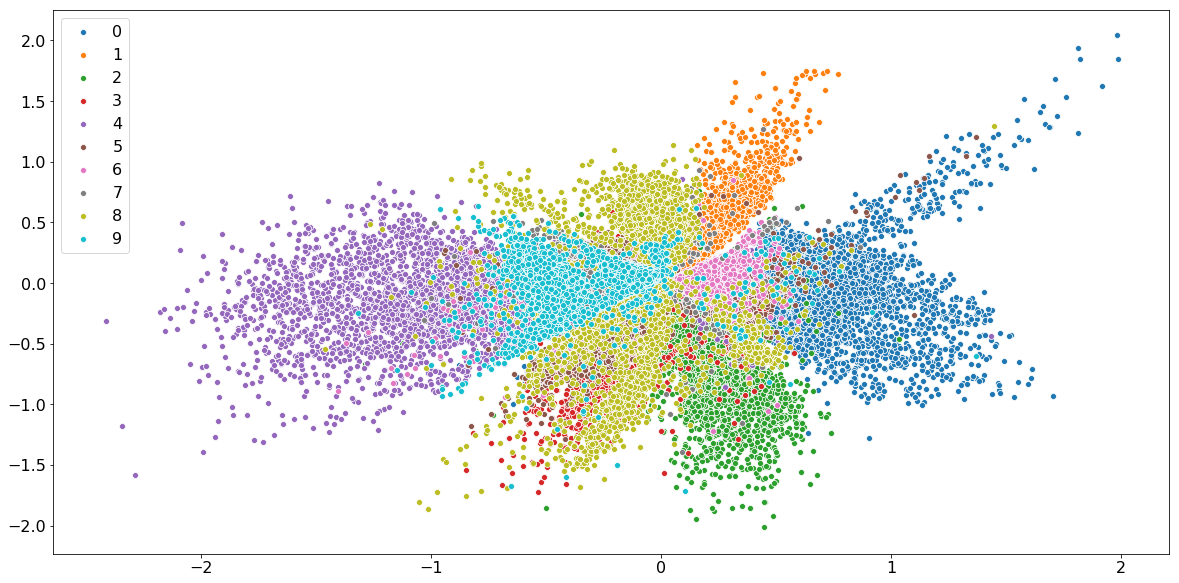

In [24]:
mnist_data = mnist_data.astype(np.float32)
plt.figure(figsize=(20, 10))
for l in np.unique(mnist_labels):
    latent_space, _ = v.map_to_latent(mnist_data[mnist_labels == l])
    latent_space = latent_space.numpy()
    
    sb.scatterplot(latent_space[:, 0], latent_space[:, 1], label=str(l))

plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("normal_latent.png", bbox_inches="tight")
plt.show()
    


Reconstruction
---

In [25]:
xmin, xmax = min(latent_space[:, 0]), max(latent_space[:, 0])
ymin, ymax = min(latent_space[:, 1]), max(latent_space[:, 1])

x_samples = 30
y_samples = 30

x = np.linspace(xmin, xmax, x_samples, dtype=np.float32)
y = np.linspace(ymin, ymax, y_samples, dtype=np.float32)

grid = []

for _x in x:
    for _y in y:
        grid.append([_x, _y])
        
grid = np.array(grid)

decoded, _ = v.map_from_latent(grid)

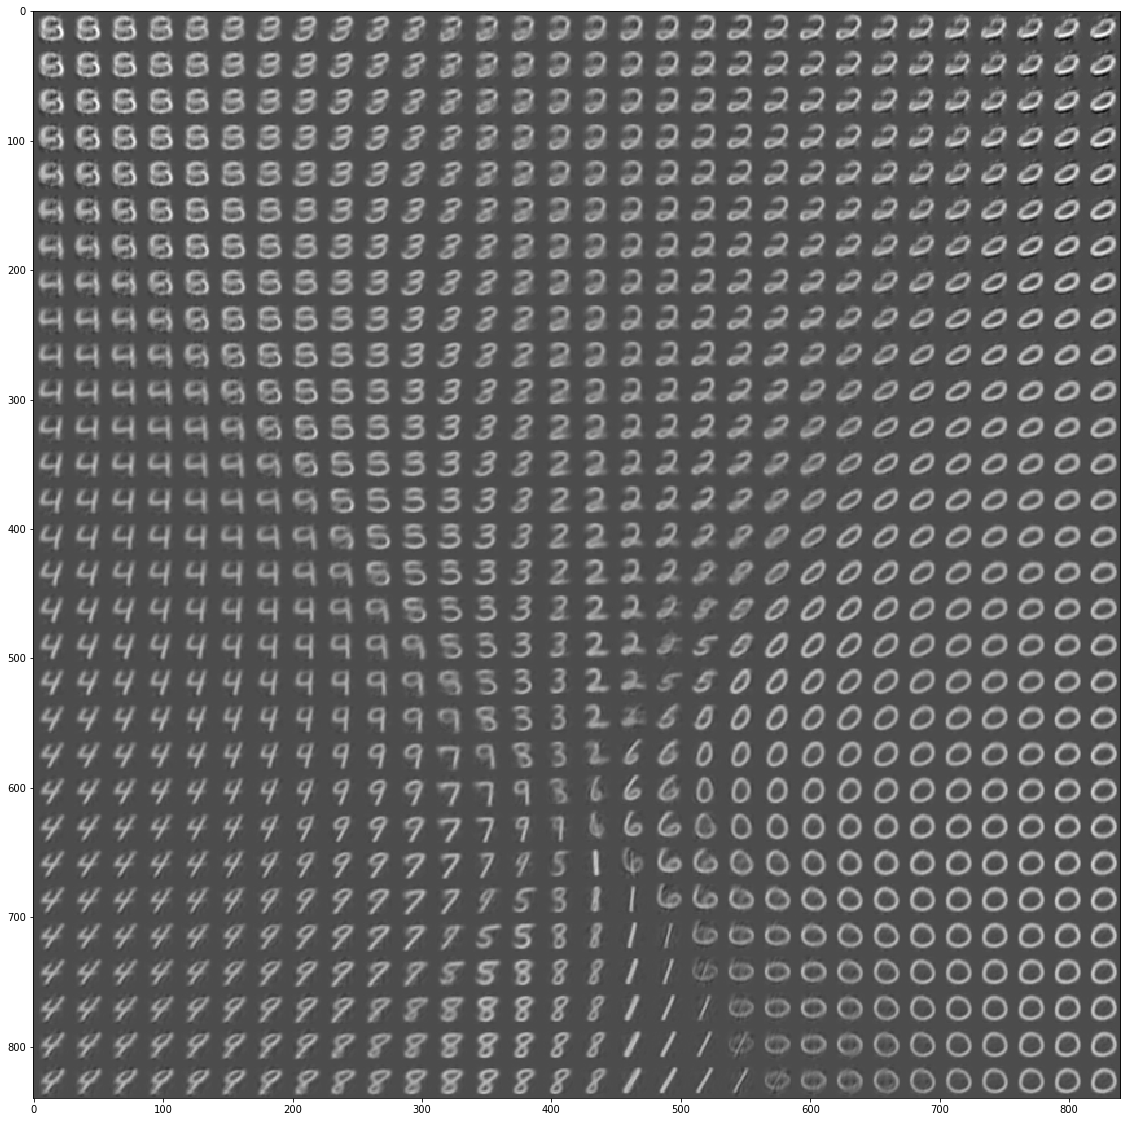

In [26]:
images = decoded.numpy().reshape(x_samples * y_samples, data_dim)

plt.figure(figsize=(30, 20))

image = np.zeros((x_samples * im_sz, y_samples * im_sz))

for i in range(0, x_samples * y_samples):
    x = i % x_samples
    y = i // x_samples
        
    image[x*im_sz:x*im_sz+im_sz, y*im_sz:y*im_sz+im_sz] = images[i].reshape(im_sz, im_sz)
    
plt.imshow(image, cmap="gray")

plt.savefig("generation.png", bbox_inches="tight")

plt.show()

In [22]:
print(mnist_labels.shape)

(1797,)


Dirichlet VAE
---

In [40]:
import vae
import tensorflow as tf

categories = 10
smoothness = 0.5

encoder, decoder = vae.dense_encoder_decoder_dirichlet(data_dim, 
                                             latent_dim=categories, 
                                             layers=4, 
                                             hidden_units=128, 
                                             activation=tf.nn.relu)

v = vae.DIRICHLET_VAE(encoder, decoder, smoothness=smoothness, categories=categories,
                     alpha_smoothing=0.1, label_smoothing=8)

v.fit(mnist_data, mnist_labels, batch_size=64, epochs=30)



epoch 0 - 1.11     
epoch 1 - 0.15    
epoch 2 - 0.12    
epoch 3 - 0.11    
epoch 4 - 0.10    
epoch 5 - 0.09    
epoch 6 - 0.09    
epoch 7 - 0.09    
epoch 8 - 0.09    
epoch 9 - 0.08    
epoch 10 - 0.08   
epoch 11 - 0.08   
epoch 12 - 0.08   
epoch 13 - 0.08   
epoch 14 - 0.08   
epoch 15 - 0.08   
epoch 16 - 0.08   
epoch 17 - 0.07   
epoch 18 - 0.07   
epoch 19 - 0.07   
epoch 20 - 0.07   
epoch 21 - 0.07   
epoch 22 - 0.07   
epoch 23 - 0.07   
epoch 24 - 0.07   
epoch 25 - 0.07   
epoch 26 - 0.07   
epoch 27 - 0.07   
epoch 28 - 0.07   
epoch 29 - 0.07   


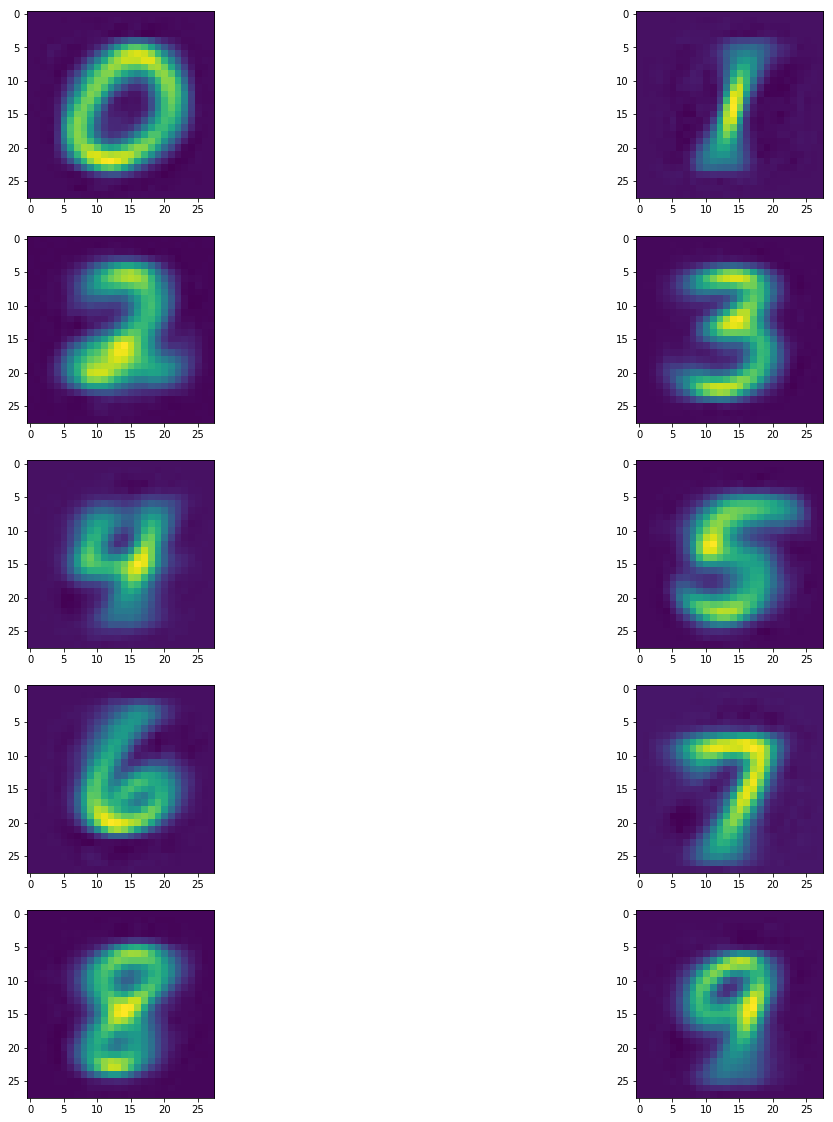

In [49]:
onehots = np.eye(10)[np.arange(10)]

images = v.map_from_latent(onehots).numpy()

plt.figure(figsize=(20, 20))
for i in range(5):
    plt.subplot(5, 2, i * 2 + 1)
    plt.imshow(images[i * 2].reshape(im_sz, im_sz))
    plt.subplot(5, 2, i * 2 + 2)
    plt.imshow(images[i * 2 + 1].reshape(im_sz, im_sz))

plt.savefig("dirichlet_ims.png", bbox_inches="tight")
plt.show()

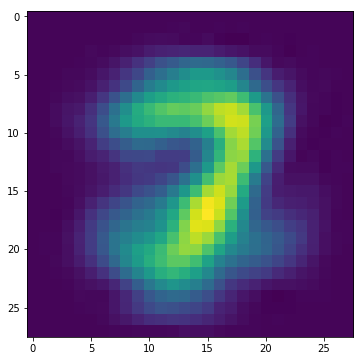

In [48]:
image = np.zeros(10)
image[7] = 0.5
image[2] = 0.5

image = image.reshape(1, 10)
image = v.map_from_latent(image).numpy()

plt.figure(figsize=(10, 6))
plt.imshow(image.reshape(im_sz, im_sz))
plt.savefig("dirichlet_blend.png", bbox_inches="tight")
plt.show()


In [44]:
from sklearn.metrics import accuracy_score
test_images, test_labels = load_test()
predictions = v.map_to_latent(test_images).numpy().argmax(axis=1)

print(accuracy_score(test_labels, predictions))

0.9754
